# This is a simple implementation of Neural Nets using Pytorch

In [3]:
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print("Shape of image - ",images.shape)
print("Shape of Labels - ", labels.shape)

<class 'torch.Tensor'>
Shape of image -  torch.Size([64, 1, 28, 28])
Shape of Labels -  torch.Size([64])


In [11]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))
criterion = nn.NLLLoss()
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [13]:
from torch import optim
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [15]:
epoch = 5
for e in range(epoch):
    running_loss = 0
    for images, labels in iter(trainloader):
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
    else:
        print(f"training_Loss is {running_loss/len(trainloader)}")

training_Loss is 0.3505210280418396
training_Loss is 0.33325648307800293
training_Loss is 0.31943488121032715
training_Loss is 0.3086013197898865
training_Loss is 0.2989250123500824


Prediction is -  5


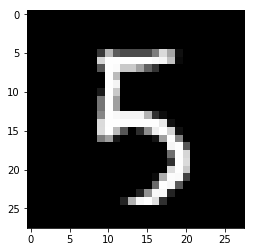

In [36]:
%matplotlib inline
# import helper
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
values = ps.argmax(1)
print("Prediction is - ",values.item())